In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Data Loading
df = pd.read_csv('dataset.csv')
df = df.drop(['loan_id'], axis=1)
df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   no_of_dependents          1048575 non-null  int64 
 1   education                 1048575 non-null  object
 2   self_employed             1048575 non-null  object
 3   income_annum              1048575 non-null  int64 
 4   loan_amount               1048575 non-null  int64 
 5   loan_term                 1048575 non-null  int64 
 6   cibil_score               1048575 non-null  int64 
 7   residential_assets_value  1048575 non-null  int64 
 8   commercial_assets_value   1048575 non-null  int64 
 9   luxury_assets_value       1048575 non-null  int64 
 10  bank_asset_value          1048575 non-null  int64 
 11  loan_status               1048575 non-null  object
dtypes: int64(9), object(3)
memory usage: 96.0+ MB


In [11]:
df.describe().map(lambda x: '{:.2f}'.format(x))

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,2.50,5050433.68,15113102.45,10.90,599.43,7453765.25,4958787.12,15093000.12,4965661.11
std,1.70,2807768.94,9057833.19,5.71,172.56,6515238.47,4382279.24,9095294.15,3253119.03
min,0.00,200000.00,300000.00,2.00,300.00,-100000.00,0.00,300000.00,0.00
25%,1.00,2600000.00,7700000.00,6.00,453.00,2100000.00,1300000.00,7500000.00,2300000.00
50%,3.00,5100000.00,14500000.00,10.00,599.00,5500000.00,3700000.00,14600000.00,4500000.00
75%,4.00,7500000.00,21400000.00,16.00,747.00,11300000.00,7600000.00,21700000.00,7100000.00
max,5.00,9900000.00,39500000.00,20.00,900.00,29100000.00,19400000.00,39200000.00,14700000.00


In [12]:
print(df['cibil_score'].max())
print(df['cibil_score'].min())
print(df['no_of_dependents'].unique())
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_term'].unique())
print(df['loan_status'].unique())

900
300
[2 0 3 5 4 1]
['Graduate' 'Not Graduate']
['No' 'Yes']
[12  8 20 10  4  2 18 16 14  6]
['Approved' 'Rejected']


In [13]:
numerical_features = ['income_annum','bank_asset_value', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

categorical_features = ['no_of_dependents', 'loan_term', 'education', 'self_employed']

print('Numerical Features: ',numerical_features)

print('Categorical Features: ',categorical_features)

Numerical Features:  ['income_annum', 'bank_asset_value', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Features:  ['no_of_dependents', 'loan_term', 'education', 'self_employed']


/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


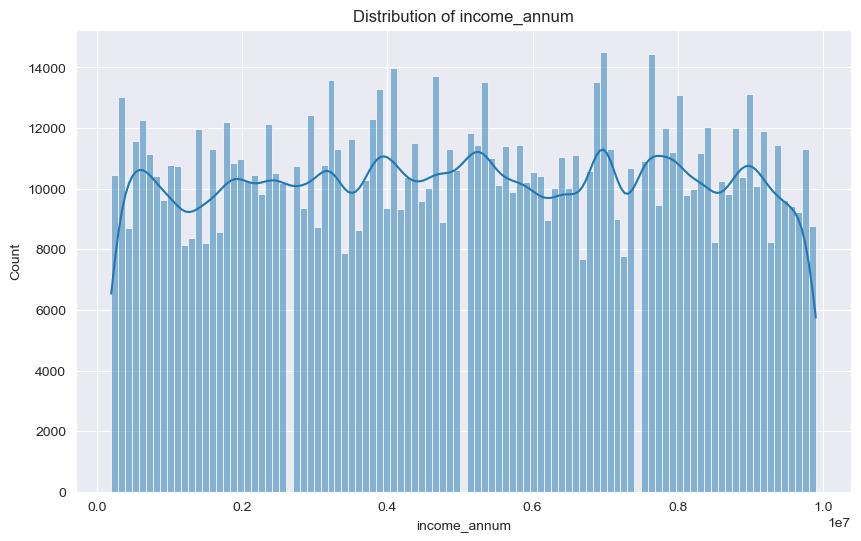

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


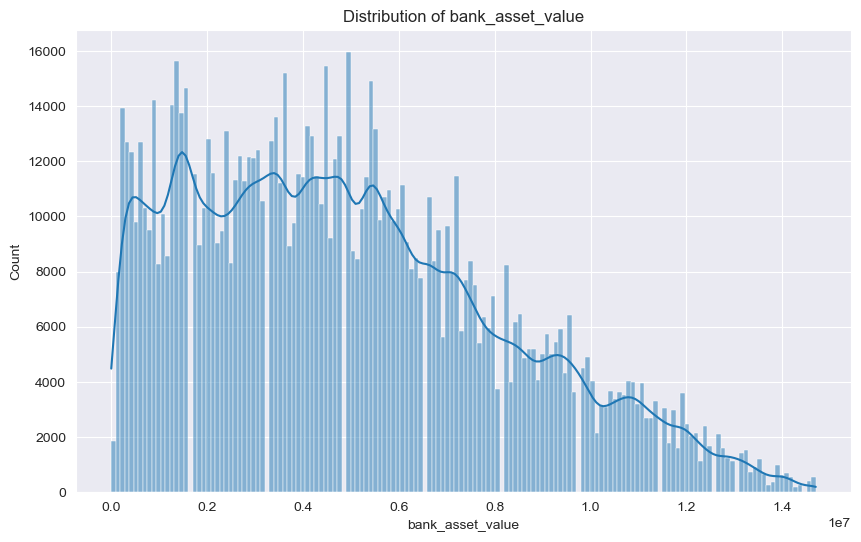

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


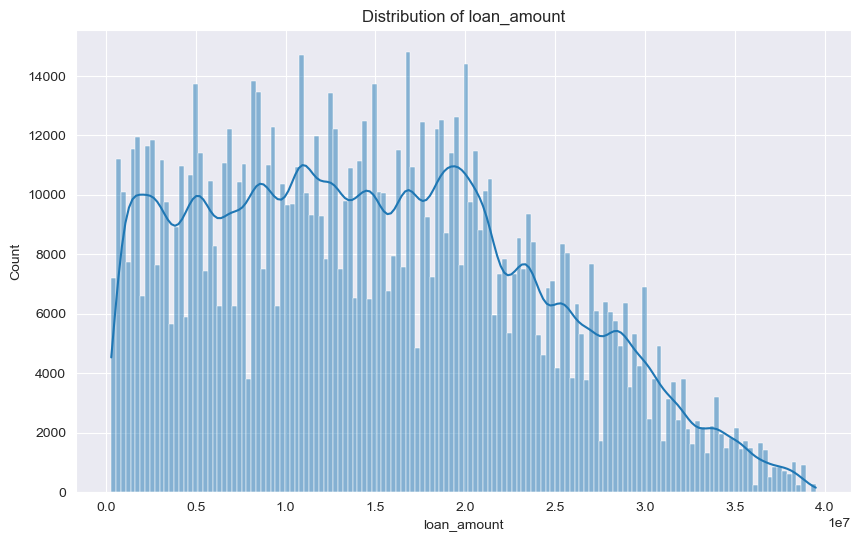

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


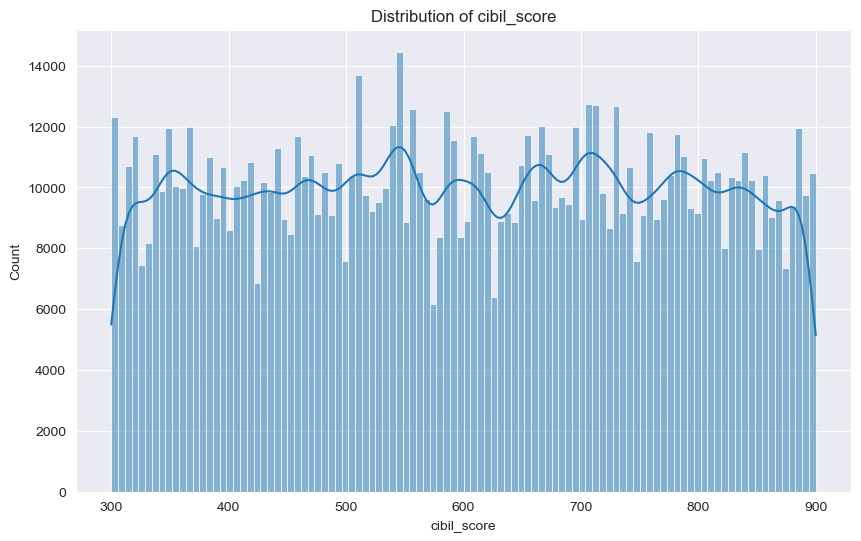

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


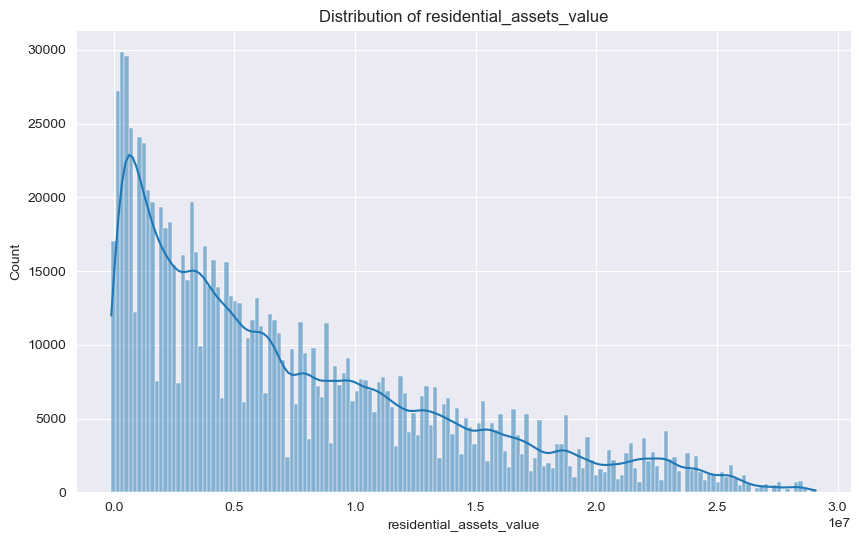

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


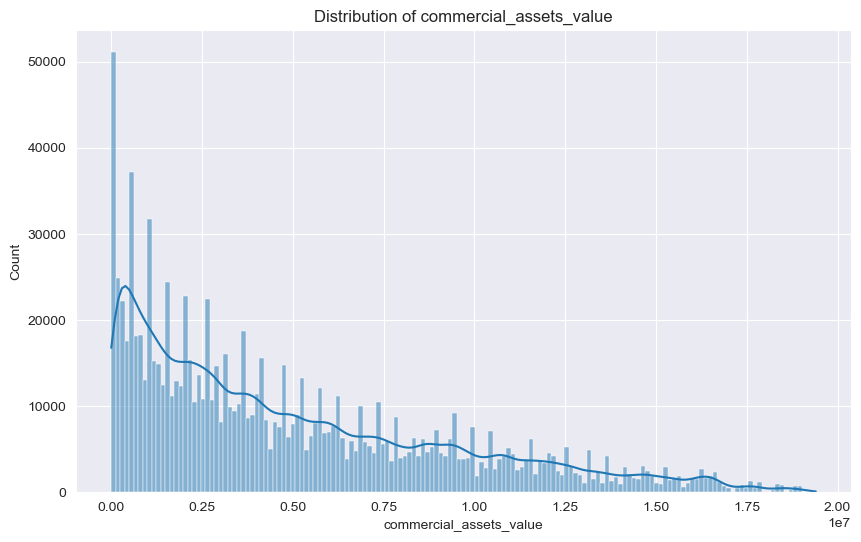

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


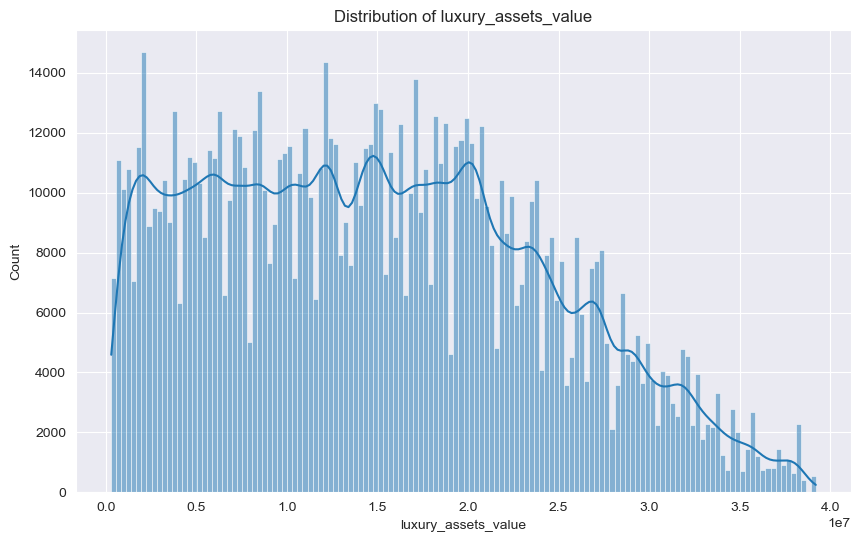

/Users/armaanmahakul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


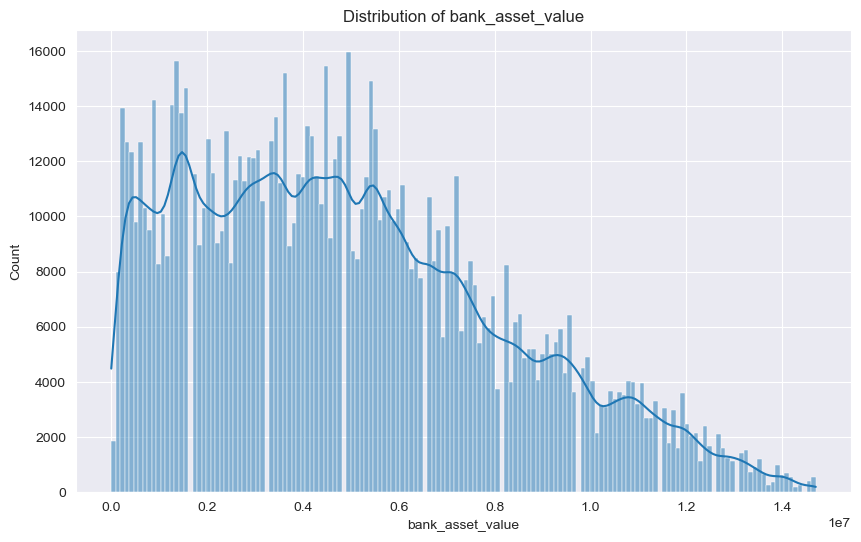

In [14]:
# Plot distributions of numerical features
for feature in numerical_features:
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, stat='count')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column {feature} not found in DataFrame.")

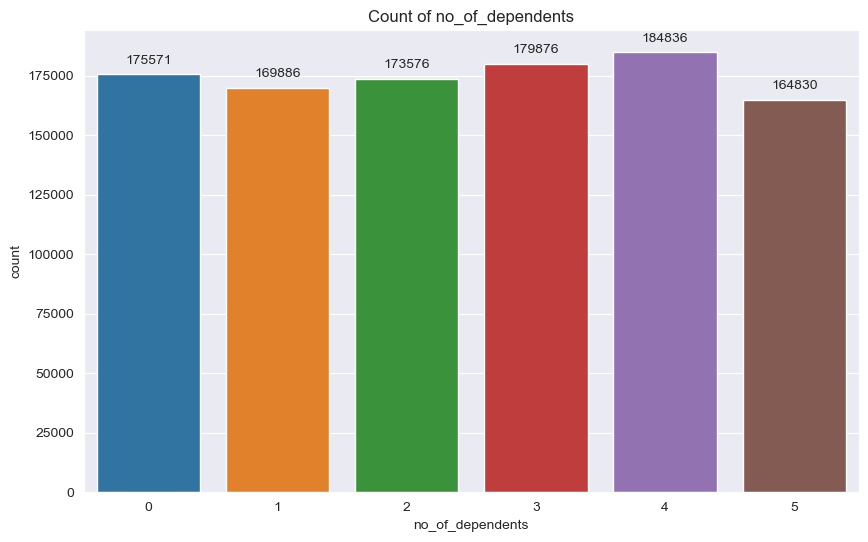

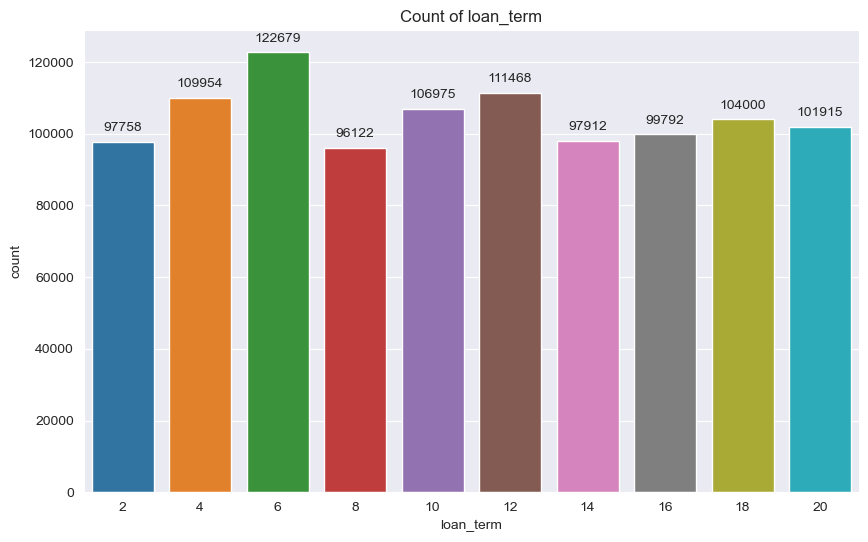

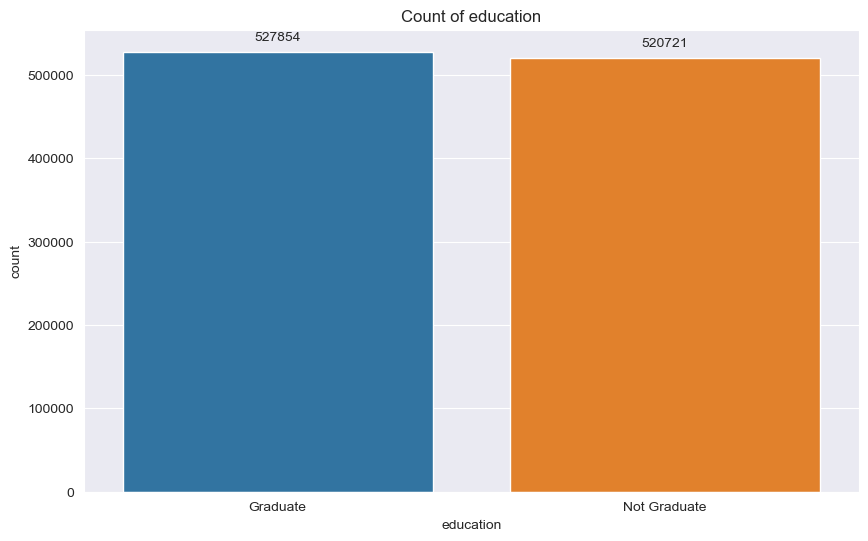

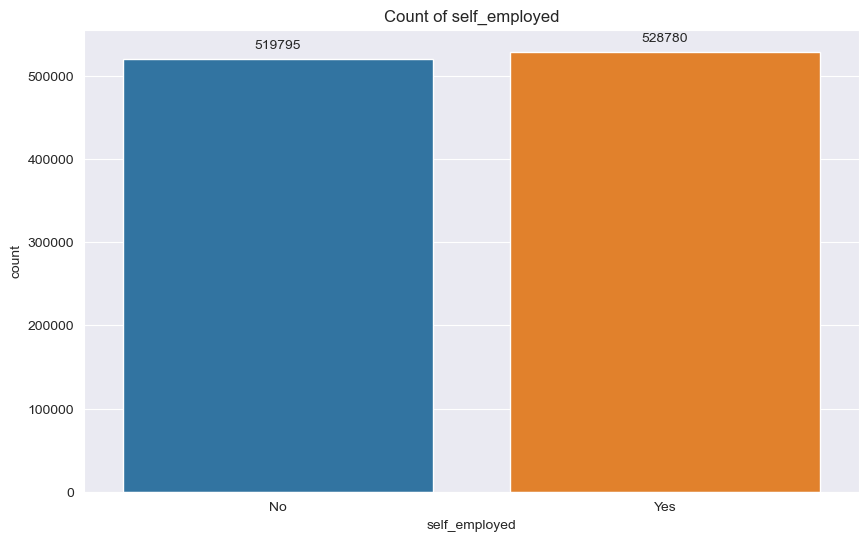

In [15]:
# Plot count of each categorical feature with count labels
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=feature)

    # Add count labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.title(f'Count of {feature}')
    plt.show()

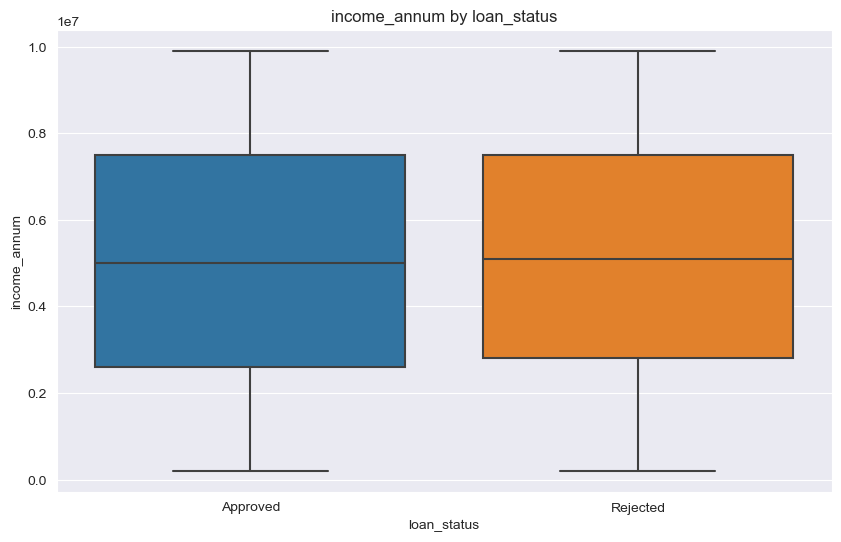

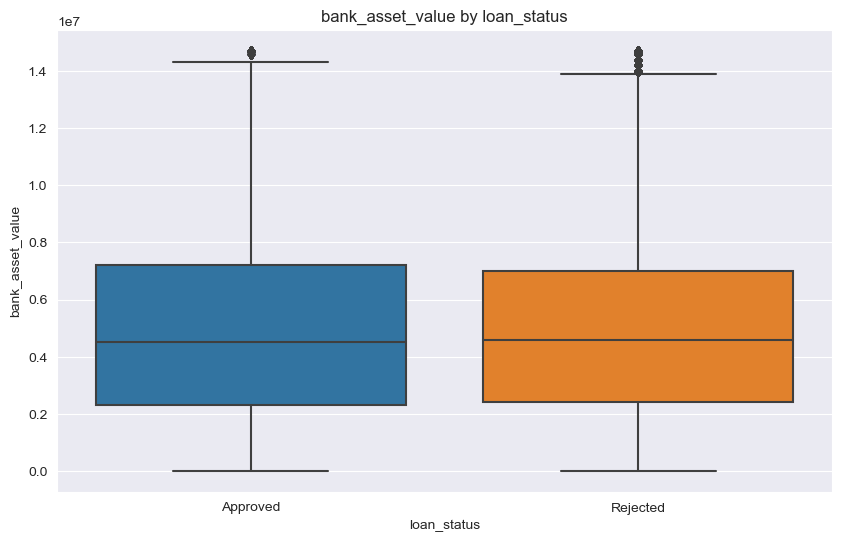

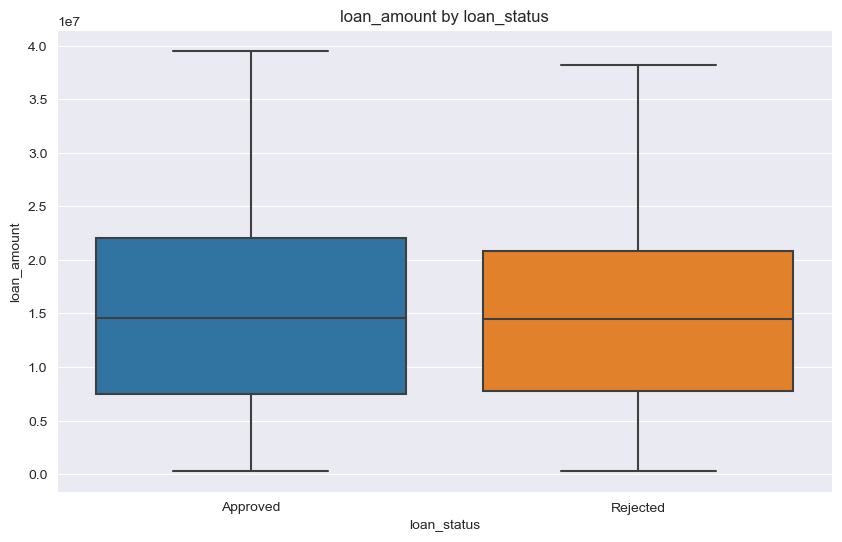

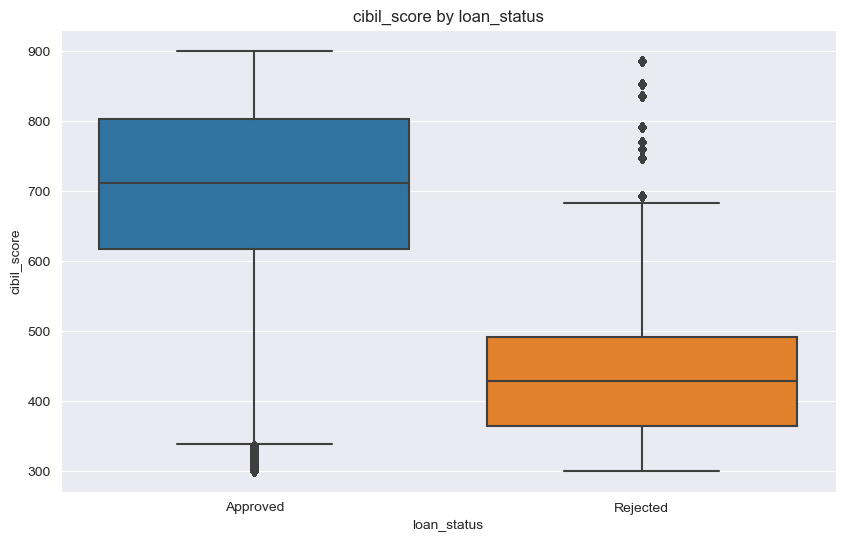

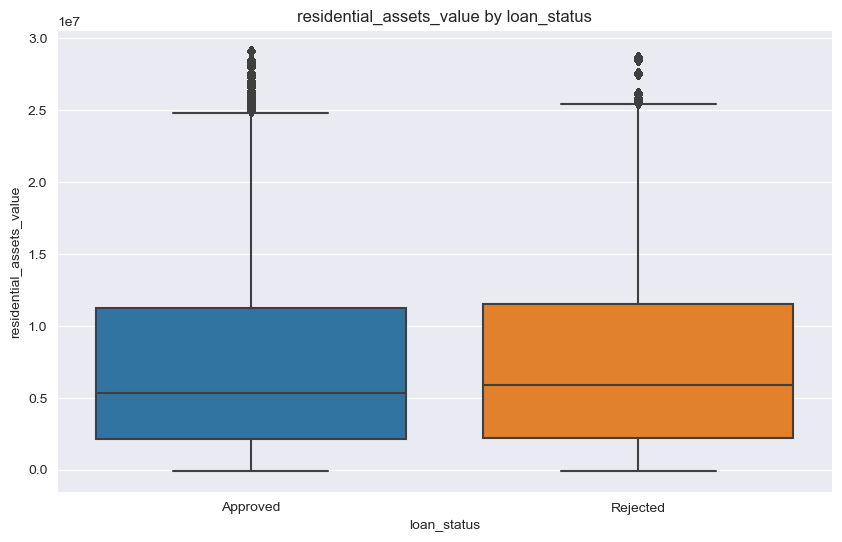

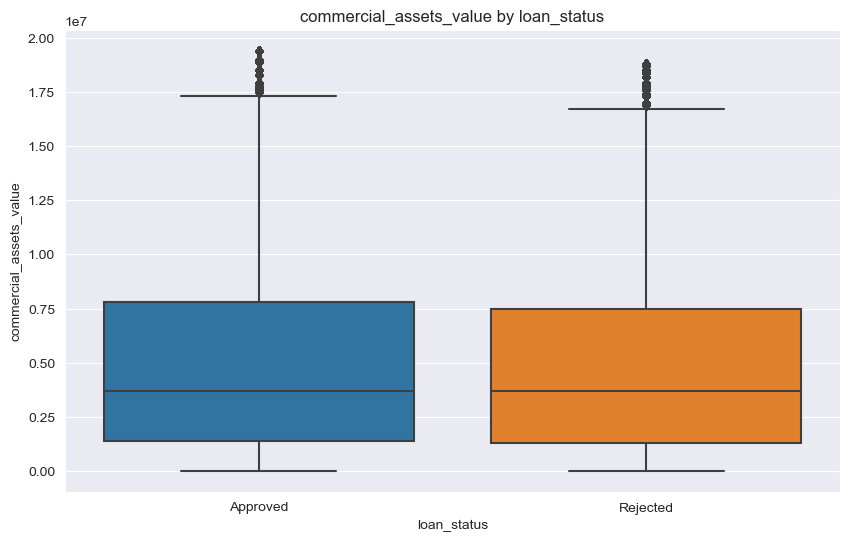

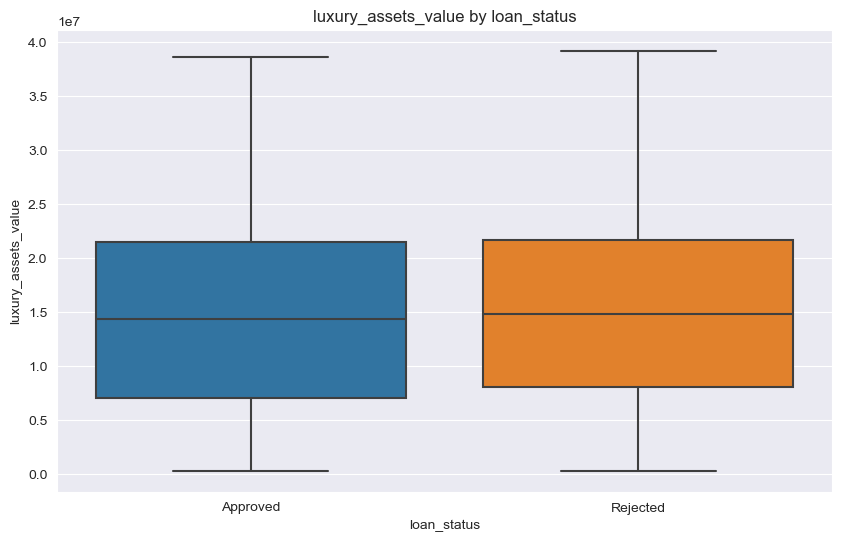

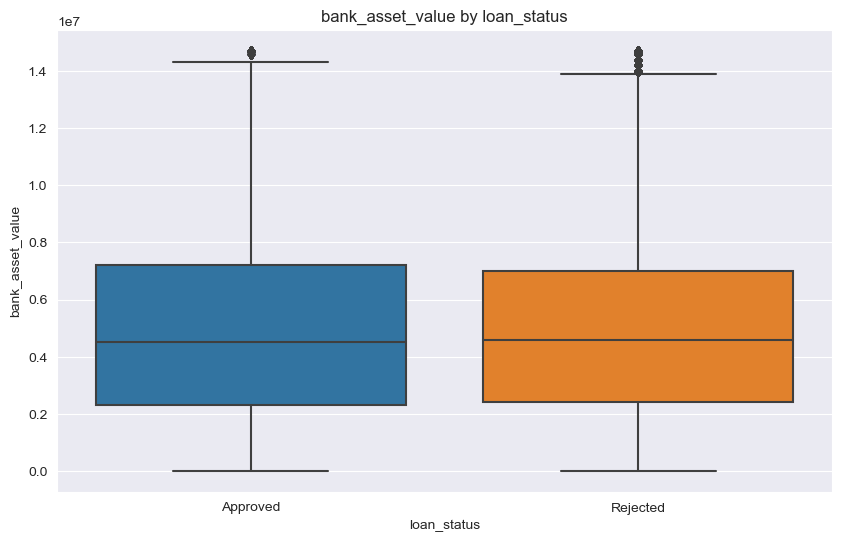

In [16]:
target = 'loan_status'
# Bivariate Analysis
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target, y=feature)
    plt.title(f'{feature} by {target}')
    plt.show()

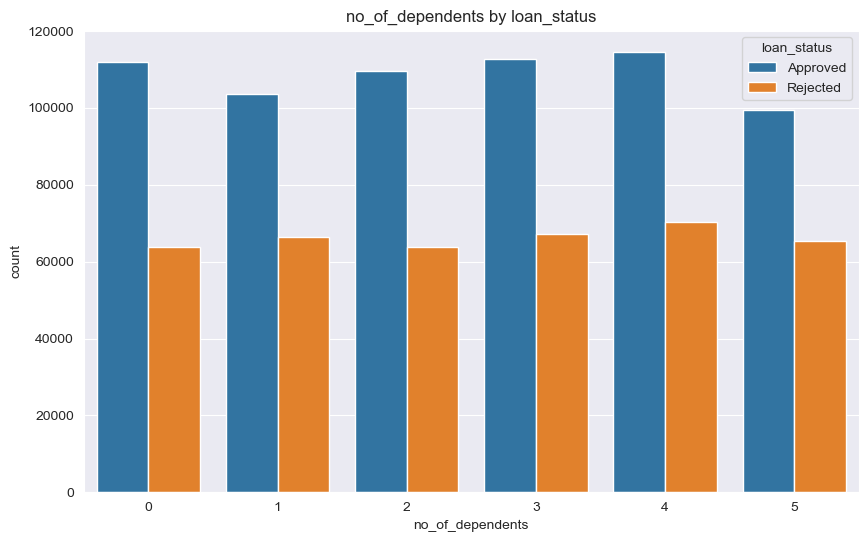

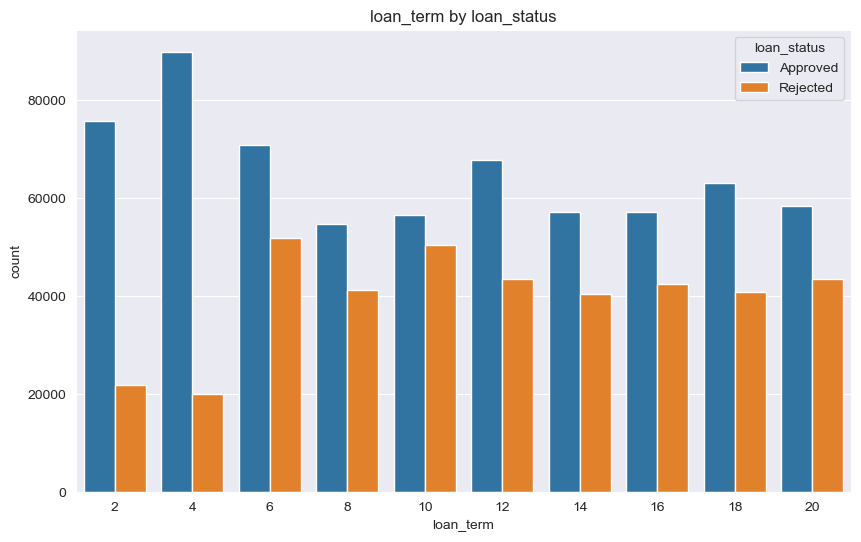

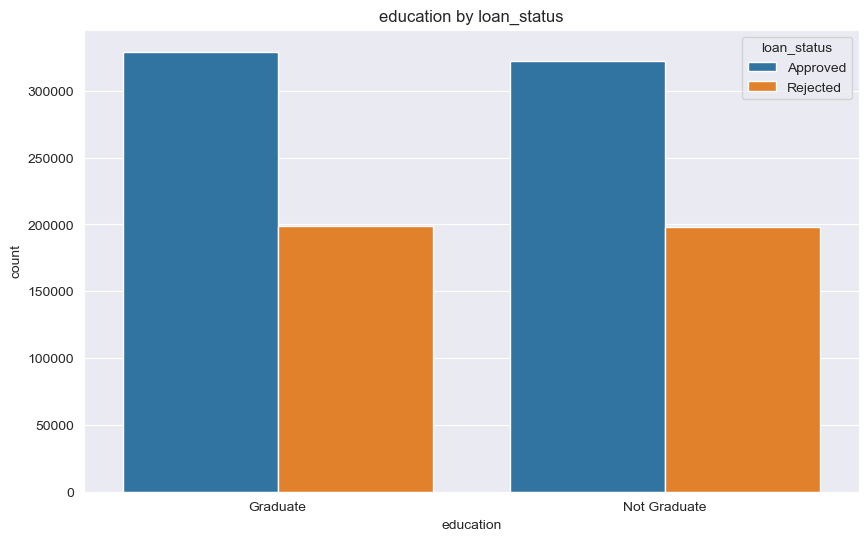

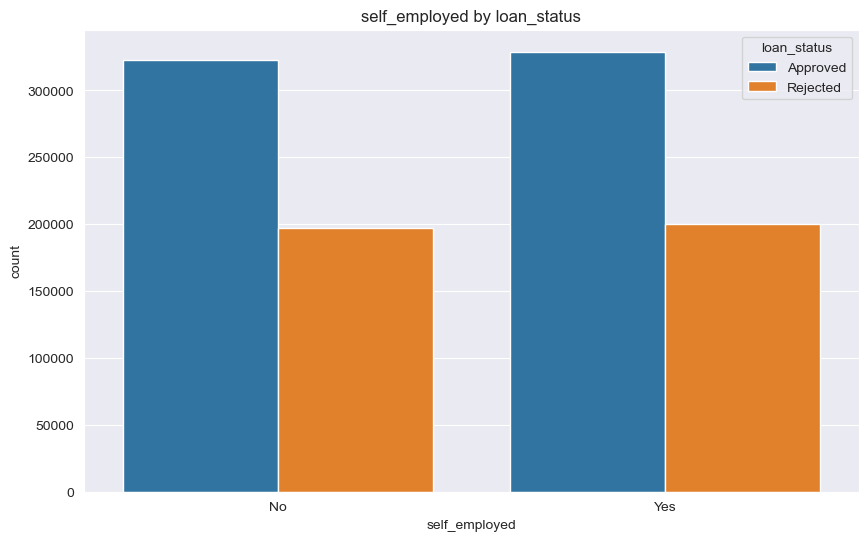

In [17]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue=target)
    plt.title(f'{feature} by {target}')
    plt.show()

In [18]:
# Define mapping dictionary
mapping1 = {'Graduate': 1, 'Not Graduate': 0}
mapping2 = {'Yes': 1, 'No': 0}
mapping3 = {'Approved': 1, 'Rejected': 0}

# Apply mapping using map function
df['education'] = df['education'].map(mapping1)
df['self_employed'] = df['self_employed'].map(mapping2)
df['loan_status'] = df['loan_status'].map(mapping3)

In [19]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [20]:
# Splitting the data
target = 'loan_status'
x = df.drop(columns=[target])
y = df[target]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [21]:
# Scaling the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [22]:
# Define models with regularization and reduced complexity
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=27),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=27),  # Limit depth
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=100, random_state=27),  # Limit depth and number of trees
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=27),  # Lower learning rate and limit depth
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=27),  # Lower learning rate and use SAMME algorithm
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10)  # Increase number of neighbors
}

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('dt', models['Decision Tree']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting']),
    ('knn', models['K-Nearest Neighbors'])
], voting='soft')

models['Voting Classifier'] = voting_clf

In [23]:
# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    confusion = confusion_matrix(y_test, y_pred_test)
    
    return accuracy_train, accuracy_test, report, confusion

In [24]:
# Evaluate models and store results
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracy_train, accuracy_test, report, confusion = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[model_name] = {
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating K-Nearest Neighbors...
Evaluating Voting Classifier...


In [25]:
# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Training Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print("Classification Report (Test):")
    print(metrics['Classification Report'])
    print("Confusion Matrix (Test):")
    print(metrics['Confusion Matrix'])


Logistic Regression:
Training Accuracy: 0.9177
Test Accuracy: 0.9177
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     79379
           1       0.93      0.94      0.93    130336

    accuracy                           0.92    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       0.92      0.92      0.92    209715

Confusion Matrix (Test):
[[ 70522   8857]
 [  8409 121927]]

Decision Tree:
Training Accuracy: 0.9756
Test Accuracy: 0.9755
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     79379
           1       0.99      0.97      0.98    130336

    accuracy                           0.98    209715
   macro avg       0.97      0.98      0.97    209715
weighted avg       0.98      0.98      0.98    209715

Confusion Matrix (Test):
[[ 78570    809]
 [  4333 126003]]

Random Forest:
Training Accurac

In [26]:
# Evaluate models and store results
results = []
for model_name, model in models.items():
    accuracy_train, accuracy_test, report, confusion = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append({
        'Model': model_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.917663       0.917669
1        Decision Tree        0.975609       0.975481
2        Random Forest        0.980084       0.980149
3    Gradient Boosting        0.994266       0.994035
4             AdaBoost        0.954098       0.954257
5  K-Nearest Neighbors        1.000000       1.000000
6    Voting Classifier        0.997164       0.996948


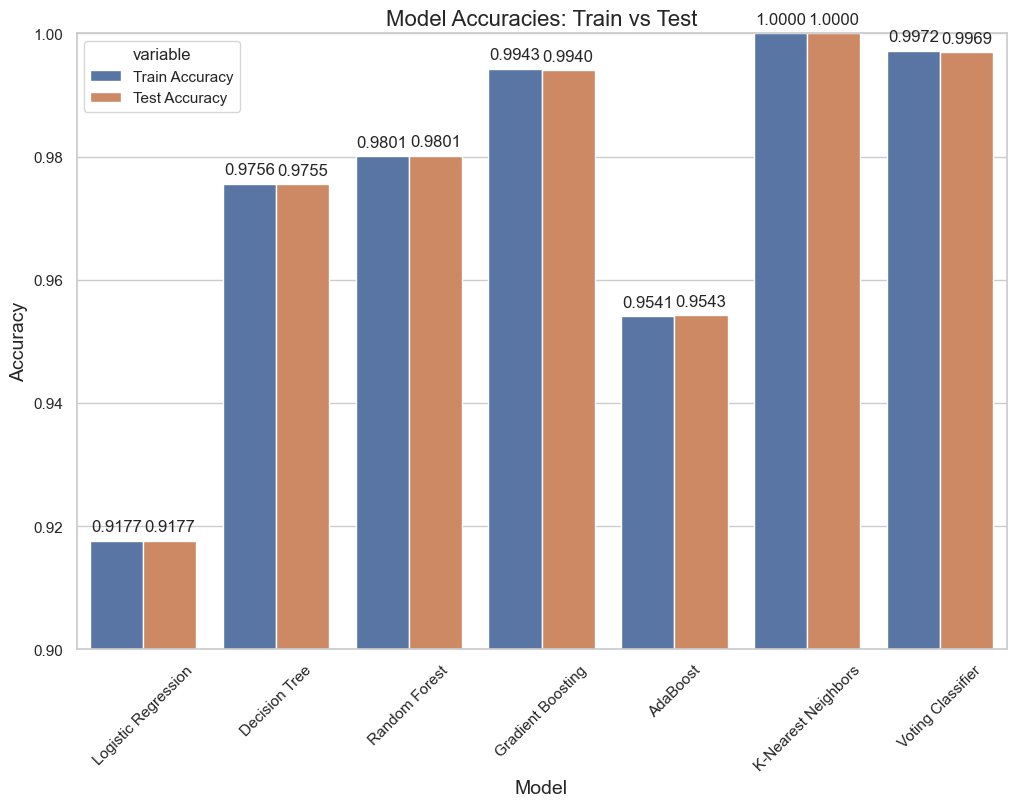

In [29]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x="Model", y="value", hue="variable", data=pd.melt(results_df, id_vars=["Model"]))

# Add titles and labels
plt.title("Model Accuracies: Train vs Test", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the y-axis limit for better clarity
plt.ylim(0.9, 1.0)  # Adjust the limits based on your specific data

# Add data labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.4f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

# Adjust y-axis ticks for finer granularity
plt.yticks([0.90, 0.92, 0.94, 0.96, 0.98, 1.00])

# Display the plot
plt.show()